# ESTAD√çSTICA INFERENCIAL

### En qu√© casos ayuda la estad√≠stica inferencial al an√°lisis de datos?

- Generalizaci√≥n a partir de Muestras: 
  - Estimaci√≥n de Par√°metros: Permite estimar par√°metros desconocidos de una poblaci√≥n (como la media, la varianza o la proporci√≥n) a partir de una muestra de datos. Esta t√©cnica se utiliza cuando es impr√°ctico o imposible recopilar datos de toda la poblaci√≥n.
  - Intervalos de Confianza: Proporcionan un rango de valores dentro del cual es probable que se encuentre el par√°metro poblacional,
     junto con un nivel de confianza asociado. Esto ayuda a comunicar la precisi√≥n de las estimaciones y la incertidumbre inherente.
- Pruebas de Hip√≥tesis


### ¬øQu√© diferencia hay entre estad√≠stica descriptiva y estad√≠stica inferencial?

La estad√≠stica descriptiva y la estad√≠stica inferencial son dos ramas de la estad√≠stica que se utilizan para diferentes prop√≥sitos. Las principales diferencias entre ambas son:

Estad√≠stica descriptiva:

* Se utiliza para describir y resumir los datos observados de forma sint√©tica y significativa.
* Se enfoca en el an√°lisis, el resumen y la presentaci√≥n de los resultados relacionados con un conjunto de datos derivados de una muestra o de toda la poblaci√≥n.
* Proporciona res√∫menes sobre los datos de la poblaci√≥n o muestra, lo que permite estructurar y representar la informaci√≥n contenida en los datos.
* No se realizan inferencias sobre la poblaci√≥n.

Estad√≠stica inferencial:

* Se utiliza para extraer conclusiones de los datos y realizar inferencias sobre la poblaci√≥n a partir de una muestra.
* Busca predecir o deducir caracter√≠sticas o resultados esperados de una poblaci√≥n, basados en los datos obtenidos de una muestra de esa poblaci√≥n.
* Se utiliza para tomar decisiones y hacer predicciones sobre la poblaci√≥n en general.
* Se basa en la probabilidad y en la teor√≠a de la muestra.


## Conceptos de Poblaci√≥n y Muestra

### Poblaci√≥n

La poblaci√≥n en estad√≠stica se refiere a todo el grupo de elementos o individuos que est√°n siendo estudiados. Es como si fuera un gran grupo de personas o cosas que queremos entender o analizar en detalle.

**Ejemplo de Poblaci√≥n:** Si queremos saber la altura promedio de todas las personas en un pa√≠s en particular, la poblaci√≥n ser√≠a todas las personas que viven en ese pa√≠s.

### Muestra:

Una muestra es un subconjunto m√°s peque√±o y representativo de la poblaci√≥n total. En lugar de estudiar a todas las personas o elementos en la poblaci√≥n, tomamos una muestra para obtener informaci√≥n sobre la poblaci√≥n en su conjunto de manera m√°s eficiente.

**Ejemplo de Muestra:** Si en lugar de medir la altura de todas las personas en un pa√≠s, seleccionamos aleatoriamente a 100 personas de diferentes regiones y edades y medimos sus alturas, entonces eso ser√≠a nuestra muestra.

### Diferencia entre Poblaci√≥n y Muestra

La diferencia clave entre poblaci√≥n y muestra es que la poblaci√≥n incluye a todos los individuos o elementos en el grupo que estamos estudiando, mientras que la muestra es solo un grupo m√°s peque√±o pero representativo de la poblaci√≥n. Usamos la muestra para hacer suposiciones y tomar decisiones sobre la poblaci√≥n en su conjunto sin tener que estudiar a cada miembro de la poblaci√≥n.

In [2]:
# ! pip install scipy

# importamos las librer√≠as que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaci√≥n
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribuci√≥n de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuraci√≥n
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gesti√≥n de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("bank-additional-clean-nonulls.csv")
df.head(2)

income  kidhome  teenhome dt customer  numwebvisitsmonth  \
0  161770        1         0  2012-04-04                 29   
1   85477        1         1  2012-12-30                  7   

                                     id        job  marital    education  \
0  089b39d8-e4d0-461b-87d4-814d71e0e079  housemaid  married     basic 4y   
1  e9d37224-cb6f-4942-98d7-46672963d097   services  married  high school   

  default housing loan    contact  duration  campaign  previous     poutcome  \
0      No      No   No  telephone       261         1         0  nonexistent   
1      No      No   No  telephone       149         1         0  nonexistent   

   emp var rate  cons price idx  cons conf idx  nr employed   y        date  \
0           1.1          93.994          -36.4       5191.0  no  2019-08-02   
1           1.1          93.994          -36.4       5191.0  no  2016-09-14   

   latitude  longitude   age  euribor3m  
0    41.495    -71.233  39.0     4.8570  
1    34.601    -83.923  57.0     4.7866

## ¬øQu√© vamos a ver en la clase de hoy?

- Intervalos de confianza
- Contraste de hip√≥tesis

# INTERVALOS DE CONFIANZA

Pretendemos estimar, predecir ciertos par√°metros poblacionales a partir de una muestra. Para esto es necesario decidir el nivel de confianza que queremos tener. 

Ejemplo, si dijeramos que la media de alturas de la poblaci√≥n con un 95% de nivel de confianza est√° entre 1.5 - 1.8 metros, estamos diciendo que teniendo en cuenta la muestra analizada, con un nivel de seguridad del 95% aseguramos que la media poblacional se encuentra entre estos valores.

Niveles de confianza m√°s altos (como 99%) brindan m√°s seguridad, pero a costa de intervalos m√°s anchos y menos precisos. Por otro lado, niveles de confianza m√°s bajos (como 90%) producen intervalos m√°s estrechos pero con menor seguridad. El nivel de confianza es crucial en la interpretaci√≥n y comunicaci√≥n de resultados estad√≠sticos.

Para el caso anterior, si quiero tener un nivel de confianza mayor, necesitar√© abrir el intervalo, por ejemplo, asegurar que la media de la estatura de la poblaci√≥n se encuentra en un 99% de seguridad entre 1.4-1.8 (estamos ganando confianza pero disminuimos la precisi√≥n del intervalo)


## Distribuci√≥n Normal

La distribuci√≥n gaussiana o normal es una de las distribuciones de probabilidad m√°s importantes en estad√≠stica. Se caracteriza por tener una forma de campana, sim√©trica alrededor de su media, y est√° completamente definida por dos par√°metros: la media (Œº) y la desviaci√≥n est√°ndar (œÉ). 

**Caracter√≠sticas de la Distribuci√≥n Normal o Gaussiana:**

* La media (Œº) es el punto en el que se encuentra el pico de la campana y representa el valor central de la distribuci√≥n.
* La desviaci√≥n est√°ndar (œÉ) controla cu√°n extendida o agrupada est√° la distribuci√≥n alrededor de la media.
* La distribuci√≥n normal es sim√©trica, lo que significa que la mitad izquierda es un espejo de la mitad derecha de la curva.
* A medida que aumenta la desviaci√≥n est√°ndar, la distribuci√≥n se vuelve m√°s ancha y achatada; a medida que disminuye, se vuelve m√°s estrecha y puntiaguda.

**Ejemplo de la distribuci√≥n normal:**

Un ejemplo com√∫n de una distribuci√≥n normal es la distribuci√≥n de alturas de la poblaci√≥n. Si se mide la altura de una gran muestra representativa de personas, generalmente se encontrar√° que sigue una distribuci√≥n normal. La mayor√≠a de las personas tienen alturas cercanas a la media, y a medida que nos alejamos de la media hacia valores m√°s altos o m√°s bajos, encontramos menos personas con esas alturas extremas.

**Identificaci√≥n de una Distribuci√≥n Gaussiana:**

Para identificar si un conjunto de datos sigue una distribuci√≥n gaussiana, puedes realizar algunas comprobaciones:

1. **Histograma:** Crea un histograma de tus datos y observa si tiene una forma de campana. De ser as√≠, es una indicaci√≥n de que podr√≠a seguir una distribuci√≥n normal.
2. **Prueba de normalidad:** Puedes utilizar pruebas estad√≠sticas como la prueba de Kolmogorov-Smirnov o la prueba de Shapiro-Wilk para evaluar si tus datos se ajustan a una distribuci√≥n normal.

Es importante destacar que en la pr√°ctica, los datos reales a menudo no siguen una distribuci√≥n perfectamente normal, pero la distribuci√≥n normal es un modelo √∫til y se utiliza con frecuencia en estad√≠stica debido a sus propiedades matem√°ticas y su amplia aplicabilidad en muchos contextos.

Para generar una distribuci√≥n de datos normal usaremos el m√©todo `np.random.normal()`. Si sintaxis es:

```python
np.random.normal(loc, scale, size)
```

Donde:

* `loc`: Es la media (o promedio) de la distribuci√≥n normal que deseas generar. Por defecto, es 0.0.
* `scale`: Es la desviaci√≥n est√°ndar de la distribuci√≥n normal que deseas generar. Por defecto, es 1.0.
* `size`: Es el tama√±o de la muestra que deseas generar. Puede ser un n√∫mero entero o una tupla que especifique las dimensiones de la muestra (como lo hicimos en NumPy). Por defecto, es None, lo que genera un solo n√∫mero aleatorio.

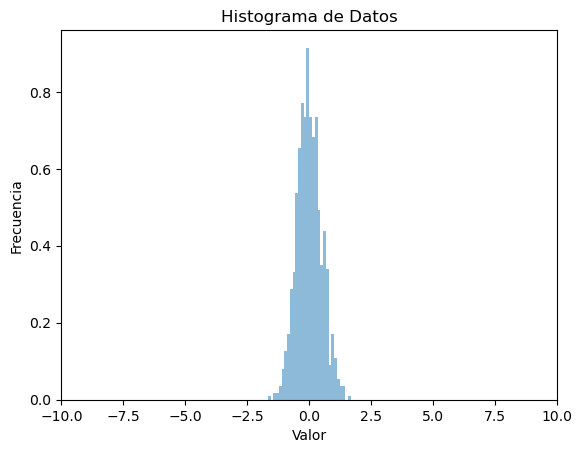

In [4]:
# generamos un array con media = 0, desviaci√≥n est√°ndar = 1, 1000 muestras
data = np.random.normal(0, 0.5, 1000) 

# creamos un DataFrame con los datos normales creados previamente
df_normal = pd.DataFrame({'Datos': data})

# Crear un histograma para visualizar la distribuci√≥n
plt.hist(df_normal['Datos'], 
         bins=30, 
         density=True, 
         alpha=0.5)

# ponemos t√≠tulo a la gr√°fica
plt.title('Histograma de Datos')

# cambiamos el nombre del eje x
plt.xlabel('Valor')

# cambiamos el nombre del eje y
plt.ylabel('Frecuencia')
plt.xlim(-10, 10);

# como podemos ver los datos generados tienen forma de campana de Gauss, por lo que podemos decir que es una distribuci√≥n normal. 

## Ejemplo 1

Imagina que eres el gerente de un centro de llamadas de una empresa de servicios financieros. Tu equipo realiza llamadas a clientes para ofrecerles productos financieros y resolver sus consultas. 
- Quieres entender mejor cu√°nto tiempo en promedio pasan tus agentes en una llamada y tener una idea de la variabilidad en la duraci√≥n de las llamadas. 
- Esto es importante para la planificaci√≥n de recursos, la gesti√≥n de la carga de trabajo y la optimizaci√≥n de la productividad de tu equipo. 

## A tener en cuenta:
- Estamos trabajando con una muestra, no una poblaci√≥n

### Receta: Esto es lo que haremos siempre
1. Vemos la distribuci√≥n de llamadas junto con la media
2. Calculamos la desviaci√≥n estandard (std)
3. Seleccionamos un nivel de confianza
4. Calculamos el intervalo de confianza

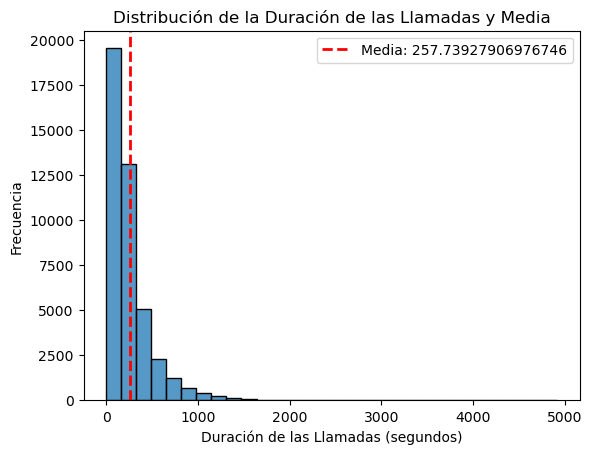

In [5]:
# 1. Vemos la distribuci√≥n de llamadas junto con la media

mean_duration= df['duration'].mean()

# Visualizaci√≥n: Histograma con la media
sns.histplot(df['duration'], bins=30)
plt.axvline(mean_duration, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_duration}')

# Cambiar los nombres de los ejes
plt.xlabel('Duraci√≥n de las Llamadas (segundos)')
plt.ylabel('Frecuencia')

# Cambiar el t√≠tulo del gr√°fico
plt.title('Distribuci√≥n de la Duraci√≥n de las Llamadas y Media')
plt.legend()
plt.show()



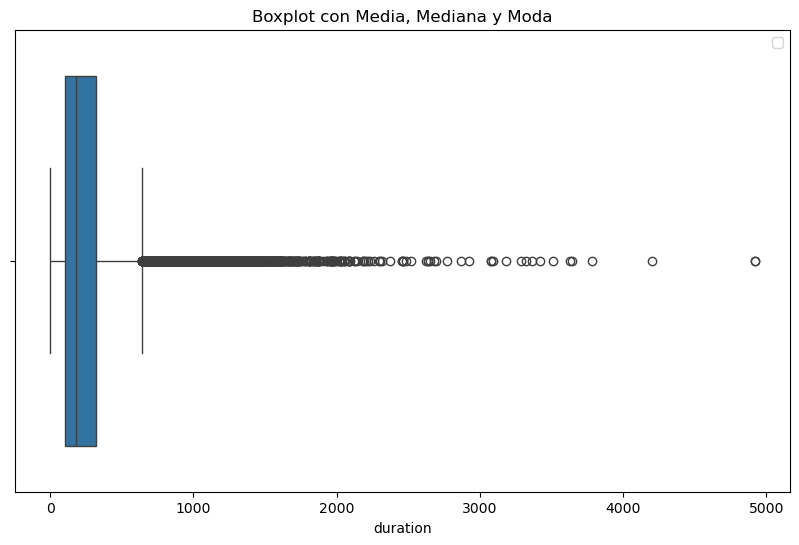

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['duration'])

# A√±adir leyenda y t√≠tulo
plt.legend()
plt.title('Boxplot con Media, Mediana y Moda')

# Mostrar el gr√°fico
plt.show()

In [7]:
# 2. Calculamos la desviaci√≥n estandard (std)

std_duration = df['duration'].std()
mean_duration = df['duration'].mean()
n = len(df['duration'])

confidence = 0.95

# 3. Seleccionamos un nivel de confianza
El nivel de confianza indica cu√°n seguro est√°s de que tu resultado es correcto.

Otro ejemplo:
- Imagina que est√°s encuestando a clientes para estimar cu√°ntas personas est√°n satisfechas con un producto. Como no puedes encuestar a toda la poblaci√≥n, tomas una muestra.
- Si eliges un nivel de confianza del 95%, significa que est√°s 95% seguro de que la verdadera satisfacci√≥n de los clientes est√° dentro del rango que calculaste.
- En otras palabras, si realizas la encuesta 100 veces,  y calculas un intervalo de confianza para cada muestra, el 95% de esos intervalos incluir√°n la verdadera satisfacci√≥n de los clientes.

Otra forma de explicarlo:

- Un nivel de confianza del 95% significa que conf√≠as en que el proceso de construir intervalos capturar√° la media verdadera el 95% de las veces.

- No sabes si el intervalo espec√≠fico que calculaste contiene la media verdadera, pero conf√≠as en el proceso.

- Si repites la encuesta muchas veces, el 95% de los intervalos capturar√°n la media verdadera, pero un 5% no lo har√°.


In [8]:
# 4. Calculamos el intervalo de confianza

# Extraer la columna 'duration' (duraci√≥n de llamadas en segundos)
durations = df['duration']
# Tama√±o de la muestra
n = len(df['duration'])

# Calcular el intervalo de confianza al 95%
confidence_interval = stats.t.interval(
    confidence=0.99,         # Nivel de confianza
    df=n-1,             # Grados de libertad
    loc=mean_duration,  # Media de la muestra
    scale=std_duration/ np.sqrt(n)  # Error est√°ndar de la media
)

# Mostrar el resultado
print(f"Media: {mean_duration:.2f} segundos")
print(f"Intervalo de Confianza al 99%: {confidence_interval[0].round(2), confidence_interval[1].round(2)}")

Media: 257.74 segundos
Intervalo de Confianza al 99%: (254.53, 260.95)


Respuesta: La duraci√≥n media de las llamadas est√° contenida en (255.3, 260.2) con un nivel de confianza del 99%

# Necesitamos:
- media -> calculamos
- desviaci√≥n standard -> calculamos
- tama√±o de la muestra -> len(muestra)
- nivel de confianza -> lo decidimos nostras

**Interpretaci√≥n**:  Indica que, con un 95% de confianza, podemos decir que la duraci√≥n promedio de las llamadas estar√° entre 255.29 y 260.18 segundos.

Para que nos puede ayudar esto en un caso real: 

- **Planificaci√≥n de Recursos:** Saber que el intervalo de confianza va desde, por ejemplo, 255.29 a 269.18 segundos de duraci√≥n, nos puede permitir planificar la asignaci√≥n de agentes y recursos en funci√≥n de esa estimaci√≥n.

- **Gesti√≥n de la Carga de Trabajo:** Si tienes un d√≠a con un alto volumen de llamadas, puedes utilizar esta estimaci√≥n para estimar cu√°nto tiempo llevar√° atender a todos los clientes y garantizar una distribuci√≥n adecuada de las llamadas entre los agentes.

## Ejemplo 2

- Imagina que est√°s desarrollando una estrategia de marketing dirigida a diferentes grupos de edad. Quieres asegurarte de que tus mensajes y ofertas sean relevantes para tus clientes. 
- Sin embargo, no puedes conocer la edad de todos los clientes, por lo que decides tomar una muestra aleatoria de registros de clientes y calcular un intervalo de confianza para la edad promedio de tu base de clientes.

En otras palabras:
- quieres saber la edad promedio de tus clientes para dirigir campa√±as apropiadas
- como no tienes toda la poblaci√≥n (todos los clientes), vamos a trabajar con una muestra (un subgrupo)
- en este caso, vamos a dar un intervalo

### Receta
1. Vemos la distribuci√≥n de edades junto con la media
2. Calculamos la desviaci√≥n estandard (std)
3. Seleccionamos un nivel de confianza
4. Calculamos el intervalo de confianza

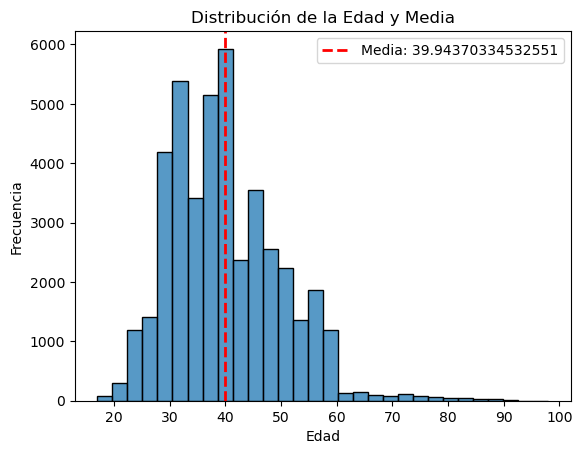

In [28]:
# 1. Vemos la distribuci√≥n de edades junto con la media

mean_age= df['age'].mean()

# Visualizaci√≥n: Histograma con la media
sns.histplot(df['age'], bins=30)
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_age}')

# Cambiar los nombres de los ejes
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Cambiar el t√≠tulo del gr√°fico
plt.title('Distribuci√≥n de la Edad y Media')
plt.legend()
plt.show()

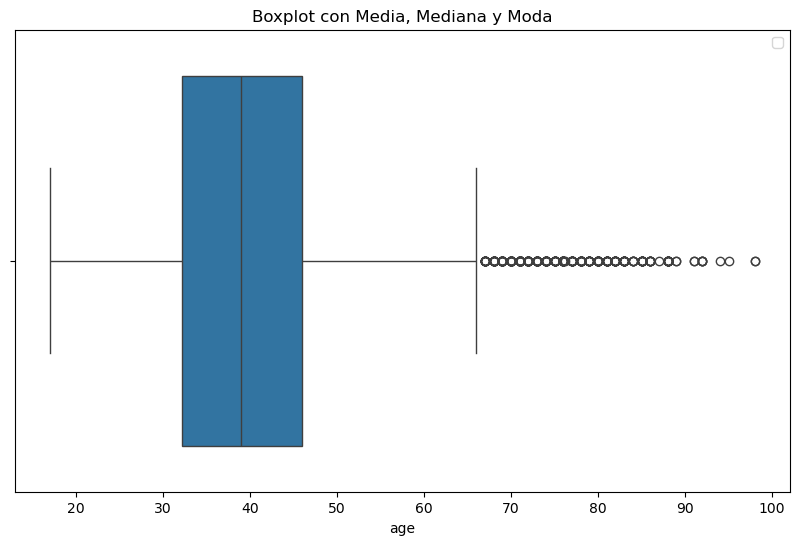

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'])



# A√±adir leyenda y t√≠tulo
plt.legend()
plt.title('Boxplot con Media, Mediana y Moda')

# Mostrar el gr√°fico
plt.show()

In [ ]:
# 2. Calculamos la desviaci√≥n estandard (std)

std_age = df['age'].std()
mean_age = df['age'].mean()
n = len(df['age'])

conficence = 0.95

In [40]:
# 4. Calculamos el intervalo de confianza

# Extraer la columna 'age' (duraci√≥n de llamadas en segundos)
age = df['age']
# Tama√±o de la muestra
n = len(age)

# Calcular el intervalo de confianza al 95%
confidence_interval = stats.t.interval(
    confidence=confidence,         # Nivel de confianza
    df=n-1,             # Grados de libertad
    loc=mean_age,  # Media de la muestra
    scale=std_age/ np.sqrt(n)  # Error est√°ndar de la media
)

# Mostrar el resultado
print(f"Media: {mean_age:.2f} a√±os")
print(f"Intervalo de Confianza al 95%: {confidence_interval}")

Media: 39.94 a√±os
Intervalo de Confianza al 95%: (39.84986884535741, 40.037537845293606)


**Interpretaci√≥n**:  Indica que, con un 90% de confianza, podemos decir que la edad promedio de los clientes estar√° entre 39.93 y 40.09 segundos.

Para que nos pueden ser √∫tiles estos valores: 

- **Segmentaci√≥n Efectiva:** Podemos utilizar el intervalo de confianza para identificar los grupos de edad m√°s probables entre nuestros clientes y adaptar las campa√±as de marketing espec√≠ficamente a esas edades.

- **Optimizaci√≥n de Recursos:** Si observamos una amplia variabilidad en las edades de los clientes, podemos ajustar la asignaci√≥n de recursos y personalizar tus estrategias para atender a un espectro m√°s amplio de edades.

## Pruebas de Hip√≥tesis
Una prueba de hip√≥tesis es un procedimiento estad√≠stico que se utiliza para tomar decisiones basadas en datos observados en relaci√≥n con afirmaciones o suposiciones sobre una poblaci√≥n o un proceso. Es una forma de evaluar la validez de una afirmaci√≥n (hip√≥tesis) sobre poblaciones basadas en la evidencia proporcionada por muestras de datos observados. Normalmente se siguen los siguientes pasos:
- **Formulaci√≥n de la hip√≥tesis**:
- **Elecci√≥n del nivel de significancia**: El nivel de significancia Œ± (alfa) es la probabilidad de rechazar la hip√≥tesis nula cuando en realidad es verdadera. Es una decisi√≥n subjetiva tomada por el investigador y generalmente se elige antes de realizar la prueba de hip√≥tesis. Los valores comunes de nivel de significancia son 0.05 (5%) y 0.01 (1%), pero tambi√©n pueden variar dependiendo del campo de estudio, la naturaleza del problema y las convenciones estad√≠sticas.


## ¬øQu√© es el  nivel de significancia?

El nivel de significancia (ùõº) es el complemento del nivel de confianza. Indica la probabilidad de cometer un error al rechazar la hip√≥tesis nula cuando en realidad es verdadera.

Ejemplo simple:

Si seleccionas un nivel de significancia del 5% (ùõº=0.05), significa que aceptas un 5% de riesgo de cometer un error tipo I (rechazar la hip√≥tesis nula cuando en realidad es verdadera).

Elegir un nivel m√°s bajo de nivel de significancia (que me llevar√≠a a aceptar m√°s f√°cilmente la hip√≥tesis nula) o un nivel de significancia m√°s alto (ser√≠a m√°s exigente para aceptar la hip√≥tesis nula) depende del contexto. ¬øPrefiero no aceptar hip√≥tesis nula aun a riesto de equivocarme y que sea cierta? ¬øO prefiero aceptarla aun a riesgo de dar por v√°lidas afirmaciones que no lo son, y que realmente no sea verdadera?


| Decisi√≥n / Realidad | H‚ÇÄ verdadera                                           | H‚ÇÅ verdadera                                                  |
| ------------------- | ------------------------------------------------------ | ------------------------------------------------------------- |
| **Rechazar H‚ÇÄ**     | **Error tipo I (Œ±)**: rechazamos H‚ÇÄ cuando era cierta. **FALSO NEGATIVO** | Decisi√≥n correcta (Detectamos el efecto).                     |
| **No rechazar H‚ÇÄ**  | Decisi√≥n correcta (Aceptamos H‚ÇÄ siendo cierta).        | **Error tipo II (Œ≤)**: no rechazamos H‚ÇÄ cuando H‚ÇÅ era cierta. **FALSO POSITIVO** |


- **Selecci√≥n del estad√≠stico de prueba**: 

![alt text](diagrama_flujo_prueba_hipotesis.png)

1) Paso primero: Ver si los datos son normales (kolmogorov-smirnov si muestra > 50 o Shapiro-Wilk si <= 50)
2) Si no son normales --> Hacemos test que eval√∫e medianas y no medias para decidir si rechazamos o no hipotesis nula (si 2 grupos <u> Mann Whitney </u>, si m√°s de dos grupos <u> Kruskal Wallis </u>)
3) Si son normales --> Evaluamos homogeneidad de varianzas (Con barlett):
      - Si son homogeneas -->  <u> t de student </u> (si dos grupos) <u> ANOVA </u> si m√°s dos grupos 
      - Si no son homogeneas --> <u> test de Welsch </u> (si dos grupos) <u> Welch-ANOVA </u> si m√°s de dos grupos

En el caso de contraste de hipotesis con una muestra usaremos test de student para muestras pareadas y para un solo grupo. 


Para todos estos casos asumiremos independencia de observaciones: No hay un test estadistico para ello. Deber√≠a ser muestras independientes. La independencia de las observaciones es uno de los supuestos m√°s importantes, pero a diferencia de la normalidad o la homogeneidad de varianzas, no se puede ‚Äútestear‚Äù directamente con un test estad√≠stico general. Se eval√∫a m√°s por    dise√±o experimental y, en algunos casos, con t√©cnicas indirectas.


In [ ]:
# SHAPIRO


p_value = stats.shapiro(df['age']).pvalue
if p_value > 0.05:
    print("No rechazamos hipotesis nula --> Distribuci√≥n normal")
else:
    print("Rechazamos hipotesis nula, aceptamos alternativa --> No normal")
    

print(p_value)

Rechazamos hipotesis nula, aceptamos alternativa --> No normal
1.874346850798574e-72


In [156]:
# kolmogorov - smirnov

p_value = stats.kstest(df['age'], 'norm').pvalue

if p_value > 0.05:
    print("No rechazamos hipotesis nula --> Distribuci√≥n normal")
else:
    print("Rechazamos hipotesis nula, aceptamos alternativa --> No normal")
    
print(p_value)

Rechazamos hipotesis nula, aceptamos alternativa --> No normal
0.0


In [43]:
# kolmogorov - smirnov

p_value = stats.kstest(df[df['marital'] == 'married']['age'], 'norm').pvalue

if p_value > 0.05:
    print("No rechazamos hipotesis nula --> Distribuci√≥n normal")
else:
    print("Rechazamos hipotesis nula, aceptamos alternativa --> No normal")
    
print(p_value)

Rechazamos hipotesis nula, aceptamos alternativa --> No normal
0.0


In [45]:
p_value = stats.kstest(df[df['marital'] == 'single']['age'], 'norm').pvalue

if p_value > 0.05:
    print("No rechazamos hipotesis nula --> Distribuci√≥n normal")
else:
    print("Rechazamos hipotesis nula, aceptamos alternativa --> No normal")
    
print(p_value)

Rechazamos hipotesis nula, aceptamos alternativa --> No normal
0.0


In [46]:
p_value = stats.kstest(df[df['marital'] == 'divorced']['age'], 'norm').pvalue

if p_value > 0.05:
    print("No rechazamos hipotesis nula --> Distribuci√≥n normal")
else:
    print("Rechazamos hipotesis nula, aceptamos alternativa --> No normal")
    
print(p_value)

Rechazamos hipotesis nula, aceptamos alternativa --> No normal
0.0


In [47]:
# HOMOGENEIDAD VARIANZAS (2 O M√ÅS GRUPOS)

casados = df[df['marital'] == 'married']
solteros = df[df['marital'] == 'single']
divorciados = df[df['marital'] == 'divorced']

In [48]:
# BARLETT (si grupos son normales) # LEVENE si no lo son

p_value = stats.bartlett(casados['age'],solteros['age'],divorciados['age']).pvalue

if p_value > 0.05:
    print("No rechazamos hipotesis nula --> Varianzas homogeneas entre grupos")
else:
    print("Rechazamos hipotesis nula, aceptamos alternativa --> Varianzas diferentes entre grupos")
    
print(p_value)

Rechazamos hipotesis nula, aceptamos alternativa --> Varianzas diferentes entre grupos
5.1295473400066467e-228


In [159]:
p_value = stats.levene(casados['age'],solteros['age'],divorciados['age']).pvalue

if p_value > 0.05:
    print("No rechazamos hipotesis nula --> Varianzas homogeneas entre grupos")
else:
    print("Rechazamos hipotesis nula, aceptamos alternativa --> Varianzas diferentes entre grupos")
    
print(p_value)


Rechazamos hipotesis nula, aceptamos alternativa --> Varianzas diferentes entre grupos
3.2552030472112654e-178


## Ejercicios

**Dataset Titanic**:
- 1) Normalemente, el precio medio del ticket para embarcar en primera clase era de $65. Queremos comprobar si esto sigue siendo cierto.
- 2) Queremos comprobar si el precio medio del ticket es mayor que $65.
- 3) Queremos comprobar si los precios medios de las mujeres son los mismos que los de los hombres.

**Dataset Presi√≥n Sangu√≠nea**:
- 4) Queremos evaluar la efectividad de un medicamento en el control de la presi√≥n sangu√≠nea.

**Dataset Salarios Data Scientists**:
- 5) Queremos comprobar si el tama√±o de la empresa influye en los salarios.

**Dataset Bank**:
- 6) Queremos comprobar si existe diferencia entre la duraci√≥n media de las llamadas entre las diferentes categor√≠as de estado civil.
- 7) ¬øHay diferencia entre ingresos promedio seg√∫n nivel de educaci√≥n?

## Receta
1. Formulaci√≥n de hip√≥tesis
2. C√°lculo de m√©tricas
3. Elecci√≥n de nivel de significancia
----------------------------------------------------------------------------------------------
4. Comprobaci√≥n de condiciones
5. Selecci√≥n del estad√≠stico
6. Toma de decisi√≥n
----------------------------------------------------------------------------------------------
7. Interpretaci√≥n de resultados

In [ ]:
# vamos a definir una funci√≥n para poder hacer el t-test de Student
def prueba_hipotesis(alfa, *args):
    """
    Realiza una prueba de hip√≥tesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versi√≥n de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney (alternativa no param√©trica).

    Par√°metros:
    *args: listas o arrays con los datos de cada grupo.

    Retorna:
    dict con resultados del test de normalidad, varianza e hip√≥tesis.
    """
    
    # Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50:
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            p_valor = stats.ttest_ind(*args, equal_var=True).pvalue
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            p_valor = stats.ttest_ind(*args, equal_var=False).pvalue
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        try: # si tengo dos grupos
            p_valor = stats.mannwhitneyu(*args).pvalue
            test_usado = "Mann-Whitney U (prueba no param√©trica)"
        except: # si tengo mas de dos grupos
            p_valor = stats.kruskal(*args).pvalue
            test_usado = "Kruskal Wallis"



    # Nivel de significancia
    alfa = alfa

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "p-valor": p_valor,
        "Conclusi√≥n": "Rechazamos H0 (Diferencias significativas)" if p_valor < alfa else "No se rechaza H0 (No hay diferencias significativas)"
    }

    # Imprimir resultados de manera m√°s clara
    print("\nüìä **Resultados de la Prueba de Hip√≥tesis** üìä")
    print(f"‚úÖ Test de Normalidad: {'S√≠' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"‚úÖ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"‚úÖ Test aplicado: {test_usado}")
    print(f" p-valor: {p_valor:.4f}")
    print(f"üîç Conclusi√≥n: {resultado['Conclusi√≥n']}\n")

    return resultado

In [161]:
# Funciones para el uso de los test estad√≠sticos t-test
# One sample t-test

# st.ttest_1samp(datos_muestra, H0)

# st.ttest_1samp(datos_muestra, H0, alternative = "greater")

# Two sample t-test

# st.ttest_ind(datos_muestra1, datos_muestra2, equal_var=False)


# Paired sample t-test

# _, p_value = st.ttest_rel(datos_antes, datos_despues)

In [50]:
titanic = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/titanic_train.csv")
blood = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/blood_pressure.csv")
salaries = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/data_science_salaries.csv")

  ## Ejercicio 1 - TEST DE UNA MUESTRA
  ### Normalemente, el precio medio del ticket de 1¬™ clase,  era de $65. Queremos comprobar si esto sigue siendo cierto.

    - H0: mu 1st class_prices = 65
    - H1: mu 1st class_prices!= 65

In [163]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [164]:
titanic[titanic['Pclass'] == 1]['Fare']

1      71.2833
3      53.1000
6      51.8625
11     26.5500
23     35.5000
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: Fare, Length: 216, dtype: float64

In [58]:
# st.ttest_1samp(datos_muestra, H0) -- ASUMIMOS NORMALIDAD, APLICAMOS T STUDENT ONE SAMPLE

first_class = titanic[titanic["Pclass"]==1]["Fare"] 

p_value = st.ttest_1samp(first_class, 65).pvalue


if p_value > 0.05:
    print("No rechazamos hipotesis nula --> Varianzas homogeneas entre grupos")
else:
    print("Rechazamos hipotesis nula, aceptamos alternativa --> La media del ticket de primera clase es diferente de 65")



Rechazamos hipotesis nula, aceptamos alternativa --> La media del ticket de primera clase es diferente de 65


Elegimos 5% significancia -> alpha = 0.05

Si p_value > alpha -> Aceptamos hip√≥tesis nula
Si p_value < alpha -> Rechazamos hip√≥tesis nula -> Aceptamos la hip√≥tesis alternativa

El t-test es robusto frente a violaciones de la normalidad, especialmente si la muestra tiene al menos 30 observaciones. Esto es gracias al Teorema Central del L√≠mite (TCL), que establece que:

Si la muestra es suficientemente grande (n ‚â• 30), la distribuci√≥n de la media muestral tiende a ser normal, incluso si los datos originales no lo son.

  ## Ejercicio 2 - TEST 1 MUESTRA
  ### Comprobar si el precio medio del ticket de 1¬™ clase,  es mayor $65.

    - H0: mu 1st class_prices <= 65
    - H1: mu 1st class_prices > 65

In [55]:
# st.ttest_1samp(datos_muestra, H0, alternative = "greater") t.test para ver si es menor o igual

first_class = titanic[titanic["Pclass"]==1]["Fare"]
_, p_value = st.ttest_1samp(first_class, 65, alternative = "greater")

if p_value > 0.05:
    print("No rechazamos hipotesis nula --> Varianzas homogeneas entre grupos")
else:
    print("Rechazamos hipotesis nula, aceptamos alternativa --> La media del ticket de primera clase es mayor de 65")

Rechazamos hipotesis nula, aceptamos alternativa --> La media del ticket de primera clase es mayor de 65


  ## Ejercicio 3 - PRUEBAS DOS GRUPOS
  ### Queremos comprobar si los precios medios de las mujeres son los mismos que los de los hombres.

    - H0: precio medio hombres = precio medio mujeres 
    - H1: precio medio hombres != precio medio mujeres 

In [59]:
titanic_mujeres = titanic[titanic["Sex"]=="female"]["Fare"]
titanic_hombres = titanic[titanic["Sex"]=="male"]["Fare"]

In [60]:
# st.ttest_ind(datos_muestra1, datos_muestra2, equal_var=False)

prueba_hipotesis(0.05, titanic_hombres, titanic_mujeres)



üìä **Resultados de la Prueba de Hip√≥tesis** üìä
‚úÖ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
‚úÖ Test de Varianza: Desiguales (p = 0.0000)
‚úÖ Test aplicado: Mann-Whitney U (prueba no param√©trica)
 p-valor: 0.0000
üîç Conclusi√≥n: Rechazamos H0 (Diferencias significativas)



{'Test de Normalidad': [False, False],
 'Datos Normales': False,
 'p-valor Varianza': 1.3255194429754062e-05,
 'Varianzas Iguales': False,
 'Test Usado': 'Mann-Whitney U (prueba no param√©trica)',
 'p-valor': 9.61232696290926e-15,
 'Conclusi√≥n': 'Rechazamos H0 (Diferencias significativas)'}

p_value < alpha -> rechazamos hip√≥tesis nula -> aceptamos hip√≥tesis alternativas

Podemos concluir que el precio medio del ticket para hombres y mujeres es diferente con un nivel de significancia del 5%. (p_value < 0.05)

  ## Ejercicio 4 - MUESTRAS PAREADAS
  **Dataset Presi√≥n Sangu√≠nea**:
  Queremos evaluar la efectividad de un medicamento en el control de la presi√≥n sangu√≠nea.

  - H0: mu before = mu after
  - H1: mu before != mu after

nivel significancia -> 0.05
alpha = 0.05

In [170]:
blood.columns

Index(['before', 'after'], dtype='object')

In [61]:
p_value = st.ttest_rel(blood["before"], blood["after"]).pvalue

if p_value > 0.05:
    print("No rechazamos hipotesis nula --> Varianzas homogeneas entre grupos")
else:
    print("Rechazamos hipotesis nula, aceptamos alternativa --> Varianzas diferentes entre grupos")
    
print(p_value)

Rechazamos hipotesis nula, aceptamos alternativa --> Varianzas diferentes entre grupos
7.303035069607835e-48


p_value es menor que 0.05 -> rechazamos Ho -> la presi√≥n sangu√≠nea media antes y despu√©s del tratamiento no es igual.

  ## Ejercicio 5 - 3 GRUPOS

**Dataset Salarios Data Scientists**:
- Queremos comprobar si el tama√±o de la empresa influye en los salarios.

  - H0: mu salario medio empresa_peque√±a = mu empresa_mediana = mu empresa_grande
  - H1: mu salario medio empresa_peque√±a != mu empresa_mediana != mu empresa_grande

nivel significancia -> 0.10
alpha = 0.10

In [172]:
salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [63]:
salaries_small = salaries[(salaries["company_size"]=="Small") & (salaries["job_title"]=="Data Scientist")]["salary_in_usd"]
salaries_medium = salaries[(salaries["company_size"]=="Medium") & (salaries["job_title"]=="Data Scientist")]["salary_in_usd"]
salaries_large = salaries[(salaries["company_size"]=="Large") & (salaries["job_title"]=="Data Scientist")]["salary_in_usd"]

In [174]:
salaries_small.values

array([110000,  12888, 120000,  55000,  75648,  54634,  52008,  60938,
        49268,  48000, 100000,  82500,   9466,  45760,  76958,  90000,
        25532,  16904,  51321,   5679,  12901,  42197,  62726,  21669,
        87738,  91237,  62726, 105000], dtype=int64)

In [175]:
# elegimos nivel significancia

In [176]:
salaries_small

1322    110000
1512     12888
2610    120000
2611     55000
2678     75648
2955     54634
3074     52008
3097     60938
3163     49268
3472     48000
3480    100000
3487     82500
3494      9466
3554     45760
3579     76958
3591     90000
3638     25532
3640     16904
3658     51321
3667      5679
3703     12901
3706     42197
3708     62726
3710     21669
3714     87738
3730     91237
3731     62726
3752    105000
Name: salary_in_usd, dtype: int64

In [64]:
prueba_hipotesis(0.05, salaries_small.values, salaries_medium.values, salaries_large.values)


üìä **Resultados de la Prueba de Hip√≥tesis** üìä
‚úÖ Test de Normalidad: No
   - Normalidad por grupo: [True, False, False]
‚úÖ Test de Varianza: Desiguales (p = 0.0022)
‚úÖ Test aplicado: Kruskal Wallis
 p-valor: 0.0000
üîç Conclusi√≥n: Rechazamos H0 (Diferencias significativas)



{'Test de Normalidad': [True, False, False],
 'Datos Normales': False,
 'p-valor Varianza': 0.0022386818801915886,
 'Varianzas Iguales': False,
 'Test Usado': 'Kruskal Wallis',
 'p-valor': 1.4698521592770334e-20,
 'Conclusi√≥n': 'Rechazamos H0 (Diferencias significativas)'}


  ## Ejercicio 6 - 2 GRUPOS
**Dataset Bank**:
- Queremos comprobar si existe diferencia entre la duraci√≥n media de las llamadas entre las diferentes categor√≠as de estado civil.**

1. **Hip√≥tesis sobre la duraci√≥n de la llamada telef√≥nica en funci√≥n del estado civil:**
   - Hip√≥tesis nula (H0): No hay diferencia en la duraci√≥n promedio de las llamadas telef√≥nicas entre personas casadas y personas solteras.
   - Hip√≥tesis alternativa (H1): Hay una diferencia significativa en la duraci√≥n promedio de las llamadas telef√≥nicas entre estos dos grupos.

In [181]:
married = df[df["marital"]=='married']["duration"]
single = df[df["marital"]=='single']["duration"]

In [183]:
prueba_hipotesis(0.05, married, single)


üìä **Resultados de la Prueba de Hip√≥tesis** üìä
‚úÖ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
‚úÖ Test de Varianza: Iguales (p = 0.0966)
‚úÖ Test aplicado: Mann-Whitney U (prueba no param√©trica)
 p-valor: 0.4511
üîç Conclusi√≥n: No se rechaza H0 (No hay diferencias significativas)



{'Test de Normalidad': [False, False],
 'Datos Normales': False,
 'p-valor Varianza': 0.09659509301007267,
 'Varianzas Iguales': True,
 'Test Usado': 'Mann-Whitney U (prueba no param√©trica)',
 'p-valor': 0.45105967102504174,
 'Conclusi√≥n': 'No se rechaza H0 (No hay diferencias significativas)'}

  ## Ejercicio 7

Hay diferencia entre ingresos promedio seg√∫n nivel de educaci√≥n basica 4 a√±os y secundaria ?

1. **Hip√≥tesis sobre los ingresos promedio en funci√≥n de la educaci√≥n:**
   - Hip√≥tesis nula (H0): No hay diferencia en los ingresos promedio entre las personas con educaci√≥n b√°sica 4 a√±os y las personas con educaci√≥n secundaria.
   - Hip√≥tesis alternativa (H1): Hay una diferencia significativa en los ingresos promedio entre estos dos grupos.
   - Prueba de hip√≥tesis: Se podr√≠a realizar una prueba t de Student para comparar los ingresos promedio de estos dos grupos.

In [193]:
basic4y = df[df['education'] == 'basic.4y']['income'] 
high_school = df[df['education'] == 'high.school']['income'] 
basic6y = df[df['education'] == 'basic.6y']['income'] 
basic9y = df[df['education'] == 'basic.9y']['income'] 
profesional_course = df[df['education'] == 'professional.course']['income'] 
university = df[df['education'] == 'university.degree']['income'] 

prueba_hipotesis(0.05, basic4y, basic6y, basic9y, profesional_course, high_school,university)


üìä **Resultados de la Prueba de Hip√≥tesis** üìä
‚úÖ Test de Normalidad: No
   - Normalidad por grupo: [False, False, False, False, False, False]
‚úÖ Test de Varianza: Iguales (p = 0.1845)
‚úÖ Test aplicado: Kruskal Wallis
 p-valor: 0.1891
üîç Conclusi√≥n: No se rechaza H0 (No hay diferencias significativas)



{'Test de Normalidad': [False, False, False, False, False, False],
 'Datos Normales': False,
 'p-valor Varianza': 0.18453386029676194,
 'Varianzas Iguales': True,
 'Test Usado': 'Kruskal Wallis',
 'p-valor': 0.18911873413255986,
 'Conclusi√≥n': 'No se rechaza H0 (No hay diferencias significativas)'}